In [1]:
import pickle, gzip, io


fp = gzip.open('data/samples/sample_ndefault','rb')   ##some problem here
    #print(type(fp))

data = pickle.load(fp)
fp.close()
#print(line)


#gz = gzip.open('data/samples/sample_0/default', 'rb')
#f = io.BufferedReader(gz)
#print(f.readlines())
#for line in f.readlines():
#    print(1)
#gz.close()

In [191]:
ff = gzip.open('data/test/sample_automatized_model/default.metamodel', 'rb')
data = pickle.load(ff)
ff.close()
data

{'parameters': {'state_variable': ['Styphi',
   'Fprau',
   'O2',
   'nitric_oxide',
   'glucose',
   'galactose',
   'thiosulfate',
   'galactarate',
   'glucarate',
   'nitrate',
   'tetrathionate',
   'butyrate',
   'neutrophils',
   'nitric_oxide_e',
   'O2_e',
   'neutrophils_e',
   'butyrate_e'],
  'luminal_compartment': ['Styphi',
   'Fprau',
   'O2',
   'nitric_oxide',
   'glucose',
   'galactose',
   'thiosulfate',
   'galactarate',
   'glucarate',
   'nitrate',
   'tetrathionate',
   'butyrate',
   'neutrophils'],
  'reduced_molecules': ['nitric_oxide', 'glucose', 'galactose', 'thiosulfate'],
  'oxidized_molecules': ['nitrate',
   'glucarate',
   'galactarate',
   'tetrathionate'],
  'rho': 0.3,
  'alpha': 0.2,
  'D': {'all': 0.041666666666666664,
   'Styphi': 0.25,
   'Fprau': 0.041666666666666664,
   'O2': 0.041666666666666664,
   'nitric_oxide': 0.041666666666666664,
   'glucose': 0.041666666666666664,
   'galactose': 0.041666666666666664,
   'thiosulfate': 0.0416666666666

In [192]:
data['Y']

t        Styphi     Fprau        O2  nitric_oxide   glucose  \
0      0.00  0.000000e+00  0.100000  0.000000      0.000000  0.020000   
1      0.01  0.000000e+00  0.100116  0.001000      0.001000  0.024357   
2      0.02  0.000000e+00  0.100232  0.002064      0.001979  0.028706   
3      0.03  0.000000e+00  0.100348  0.003187      0.002938  0.033047   
4      0.04  0.000000e+00  0.100462  0.004364      0.003877  0.037381   
...     ...           ...       ...       ...           ...       ...   
8995  89.95  7.533736e-08  0.028334  0.013299      0.000037  2.475534   
8996  89.96  7.515158e-08  0.028331  0.013299      0.000037  2.475515   
8997  89.97  7.496626e-08  0.028329  0.013299      0.000037  2.475496   
8998  89.98  7.478140e-08  0.028326  0.013299      0.000037  2.475477   
8999  89.99  7.459699e-08  0.028324  0.013300      0.000037  2.475458   

      galactose  thiosulfate  galactarate  glucarate       nitrate  \
0      0.020000     0.000000     0.000000   0.000000  0.000000e+00   
1      0.024356     0.004167     0.000000   0.000000  0.000000e+00   
2      0.028705     0.008331     0.000002   0.000002  1.000000e-07   
3      0.033046     0.012493     0.000008   0.000008  5.085247e-07   
4      0.037380     0.016650     0.000019   0.000019  1.444816e-06   
...         ...          ...          ...        ...           ...   
8995   2.474885     2.391944     7.706133   7.708757  3.794592e-03   
8996   2.474866     2.391933     7.706214   7.708838  3.793061e-03   
8997   2.474847     2.391922     7.706294   7.708918  3.791531e-03   
8998   2.474828     2.391910     7.706375   7.708998  3.790001e-03   
8999   2.474809     2.391899     7.706455   7.709078  3.788472e-03   

      tetrathionate  butyrate  neutrophils  nitric_oxide_e      O2_e  \
0      0.000000e+00  0.000000          0.0        0.100000  0.100000   
1      0.000000e+00  0.002226          0.0        0.098991  0.107990   
2      4.166667e-07  0.004419          0.0        0.098003  0.115851   
3      2.136128e-06  0.006582          0.0        0.097034  0.123588   
4      6.116800e-06  0.008717          0.0        0.096085  0.131209   
...             ...       ...          ...             ...       ...   
8995   7.390584e+00  0.014221          0.0        0.000041  0.990339   
8996   7.390685e+00  0.014220          0.0        0.000041  0.990341   
8997   7.390787e+00  0.014219          0.0        0.000040  0.990342   
8998   7.390889e+00  0.014217          0.0        0.000040  0.990343   
8999   7.390990e+00  0.014216          0.0        0.000040  0.990344   

      neutrophils_e  butyrate_e  
0               0.0    0.100000  
1               0.0    0.098039  
2               0.0    0.096063  
3               0.0    0.094076  
4               0.0    0.092081  
...             ...         ...  
8995            0.0    0.001305  
8996            0.0    0.001305  
8997            0.0    0.001305  
8998            0.0    0.001305  
8999            0.0    0.001305  

[9000 rows x 18 columns]

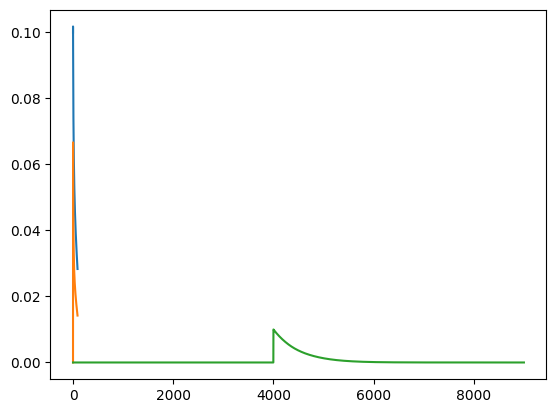

In [207]:
import matplotlib.pyplot as plt
plt.plot(data['Y']['t'], data['Y']['Fprau'])
plt.plot(data['Y']['t'], data['Y']['butyrate'])
plt.plot(data['Y']['Styphi'])

In [2]:
from dfba_sampling.experiment import ExperimentSpec
from dfba_sampling.FBA import FBA_model_Wrapper
from dfba_sampling.dFBA import Constraint_definition
import numpy as np

rng = np.random.default_rng(42) 
exp = ExperimentSpec(config="data/dFBA_styphi_fprau_oxygen_parameter.yml",
                     networks=["data/Salmonella_FBA.xml", "data/Fprau_FBA.xml"])

In [ ]:
#First, we have to extract the substrate datam then the product data and finaly the species data

spec_sub = {}
for sub in exp.substrate_metabolites:
    for spec in exp.species:
        spec_sub[spec] = exp.substrate_species(sub)

In [16]:
#lambda x: {}
#out = zip(list(map(exp.substrate_species, exp.substrate_metabolites)),exp.substrate_metabolites)
#list(out)
f = lambda x: exp.substrate_species(x)
lst = list(map(lambda x: {y: x for y in f(x)}, exp.substrate_metabolites))
{k: [dic[k] for dic in lst] for k in lst[0]}

{'Styphi': ['O2',
  'nitric_oxide',
  'glucose',
  'galactose',
  'thiosulfate',
  'galactarate',
  'glucarate',
  'nitrate',
  'tetrathionate']}

In [37]:
metabolites = [*exp.substrate_metabolites, *exp.output_metabolites]
metabolites_especies = 

['O2',
 'nitric_oxide',
 'glucose',
 'galactose',
 'thiosulfate',
 'galactarate',
 'glucarate',
 'nitrate',
 'tetrathionate',
 'butyrate']

In [68]:
import pandas as pd
mets = dict()
total_spec = exp.species
for sub in exp.substrate_metabolites:
    mets[sub] = [1 if spec in exp.substrate_species(sub) else 0 for spec in total_spec]
    
for out in exp.output_metabolites:
    mets[out] = [0 for spec in total_spec]

for i_spec, spec in enumerate(total_spec):    
    try:        
        out_dict = exp.output_reaction(spec)        
        for output in out_dict.keys():
            mets[output][i_spec] = 1
    except:
        pass

In [173]:
import pandas as pd
from dfba_sampling.experiment import ExperimentSpec
from dfba_sampling.FBA import FBA_model_Wrapper
from dfba_sampling.dFBA import Constraint_definition
import numpy as np


exp = ExperimentSpec(config="data/dFBA_styphi_fprau_oxygen_parameter.yml",
                     networks=["data/Salmonella_FBA.xml", "data/Fprau_FBA.xml"])
mets = dict()
total_spec = exp.species
for sub in exp.substrate_metabolites:
    mets[sub] = [1 if spec in exp.substrate_species(sub) else 0 for spec in total_spec]

for out in exp.output_metabolites:
    mets[out] = [0 for spec in total_spec]
    
for i_spec, spec in enumerate(total_spec):    
    try:        
        out_dict = exp.output_reaction(spec)        
        for output in out_dict.keys():
            mets[output][i_spec] = 1
    except:
        pass
    


met_selector = pd.DataFrame.from_dict(mets)
for ispec, spec in enumerate(total_spec):
    met_selector[spec] = [1 if s == spec else 0 for s in total_spec]
df = met_selector

sample_list_Y = []
for spec in total_spec:
    unordered_desired_df = sample_Y * (df[df[spec] == 1].iloc[0])
    ordered_desired_df = unordered_desired_df[df.keys()]
    sample_list_Y.append(ordered_desired_df)

#df_Styphi = df[df['Styphi'] == 1]
#df_Fprau = df[df['Fprau'] == 1]
#sample_Styphi = sample_Y*df_Styphi.iloc[0]
#sample_Fprau = sample_Y*df_Fprau.iloc[0]
#sample_Fprau = sample_Fprau[df.keys()]
#sample_Styphi = sample_Styphi[df.keys()]




In [172]:
sample_list_Y[0]

O2  nitric_oxide   glucose  galactose  thiosulfate  galactarate  \
0     0.000000      0.000000  0.020000   0.020000     0.000000     0.000000   
1     0.001000      0.001000  0.023758   0.023758     0.004167     0.000000   
2     0.002064      0.001979  0.027438   0.027438     0.008331     0.000002   
3     0.003188      0.002938  0.031038   0.031038     0.012493     0.000008   
4     0.004366      0.003877  0.034561   0.034561     0.016650     0.000018   
...        ...           ...       ...        ...          ...          ...   
8995  0.148235      0.108040  0.118237   0.118237     0.118237     0.085845   
8996  0.148235      0.108040  0.118237   0.118237     0.118237     0.085845   
8997  0.148235      0.108040  0.118236   0.118236     0.118236     0.085845   
8998  0.148235      0.108040  0.118236   0.118236     0.118236     0.085845   
8999  0.148235      0.108040  0.118236   0.118236     0.118236     0.085845   

      glucarate       nitrate  tetrathionate  butyrate    Styphi  Fprau  
0      0.000000  0.000000e+00   0.000000e+00       0.0  0.000000    0.0  
1      0.000000  0.000000e+00   0.000000e+00       0.0  0.000000    0.0  
2      0.000002  1.000000e-07   4.166667e-07       0.0  0.000000    0.0  
3      0.000008  5.085484e-07   2.136228e-06       0.0  0.000000    0.0  
4      0.000018  1.445028e-06   6.117700e-06       0.0  0.000000    0.0  
...         ...           ...            ...       ...       ...    ...  
8995   0.085845  7.844190e-02   8.584512e-02       0.0  0.355994    0.0  
8996   0.085845  7.844191e-02   8.584513e-02       0.0  0.356004    0.0  
8997   0.085845  7.844192e-02   8.584514e-02       0.0  0.356013    0.0  
8998   0.085845  7.844193e-02   8.584514e-02       0.0  0.356023    0.0  
8999   0.085845  7.844193e-02   8.584515e-02       0.0  0.356032    0.0  

[9000 rows x 12 columns]

In [165]:
a = [pd.DataFrame(),
     pd.DataFrame(),
     pd.DataFrame(),
     pd.DataFrame(),
     pd.DataFrame()]

b = [pd.DataFrame.from_dict({'a':[89], 'b':[99]}),
     pd.DataFrame.from_dict({'a':[4], 'b':[7]}),
     pd.DataFrame.from_dict({'a':[8], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[9], 'b':[0]}),
     pd.DataFrame.from_dict({'a':[3], 'b':[1]})]

c = [pd.DataFrame.from_dict({'a':[1], 'b':[9]}),
     pd.DataFrame.from_dict({'a':[65], 'b':[5]}),
     pd.DataFrame.from_dict({'a':[33], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[88], 'b':[33]}),
     pd.DataFrame.from_dict({'a':[776], 'b':[21]})]

d = [pd.DataFrame.from_dict({'a':[1545], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[4545], 'b':[7]}),
     pd.DataFrame.from_dict({'a':[8], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[908], 'b':[0]}),
     pd.DataFrame.from_dict({'a':[3], 'b':[1]})]

e = [pd.DataFrame.from_dict({'a':[1], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[4], 'b':[7]}),
     pd.DataFrame.from_dict({'a':[8], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[9], 'b':[0]}),
     pd.DataFrame.from_dict({'a':[3], 'b':[1]})]

f = [pd.DataFrame.from_dict({'a':[1], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[4], 'b':[7]}),
     pd.DataFrame.from_dict({'a':[8], 'b':[2]}),
     pd.DataFrame.from_dict({'a':[9], 'b':[0]}),
     pd.DataFrame.from_dict({'a':[3], 'b':[1]})]

samples = [b,c,d,e,f]

for i in range(len(samples)):
    f = lambda x: pd.concat([x[0], x[1]], axis = 0, ignore_index= True)
    a = list(map(f, list(zip(a, samples[i]))))

In [166]:
a[0]

a   b
0    89  99
1     1   9
2  1545   2
3     1   2
4     1   2

In [133]:
df_Styphi = df[df['Styphi'] == 1]
df_Fprau = df[df['Fprau'] == 1]
df_Styphi
df_Fprau


O2  nitric_oxide  glucose  galactose  thiosulfate  galactarate  glucarate  \
1   0             0        1          1            0            0          0   

   nitrate  tetrathionate  butyrate  Styphi  Fprau  
1        0              0         1       0      1

In [136]:
sample_Styphi = sample_Y*df_Styphi.iloc[0]
sample_Fprau = sample_Y*df_Fprau.iloc[0]

In [140]:
sample_Styphi

Fprau        O2  O2_e    Styphi  butyrate  butyrate_e  galactarate  \
0       0.0  0.000000   NaN  0.000000       0.0         NaN     0.000000   
1       0.0  0.001000   NaN  0.000000       0.0         NaN     0.000000   
2       0.0  0.002064   NaN  0.000000       0.0         NaN     0.000002   
3       0.0  0.003188   NaN  0.000000       0.0         NaN     0.000008   
4       0.0  0.004366   NaN  0.000000       0.0         NaN     0.000018   
...     ...       ...   ...       ...       ...         ...          ...   
8995    0.0  0.148235   NaN  0.355994       0.0         NaN     0.085845   
8996    0.0  0.148235   NaN  0.356004       0.0         NaN     0.085845   
8997    0.0  0.148235   NaN  0.356013       0.0         NaN     0.085845   
8998    0.0  0.148235   NaN  0.356023       0.0         NaN     0.085845   
8999    0.0  0.148235   NaN  0.356032       0.0         NaN     0.085845   

      galactose  glucarate   glucose  neutrophils  neutrophils_e  \
0      0.020000   0.000000  0.020000          NaN            NaN   
1      0.023758   0.000000  0.023758          NaN            NaN   
2      0.027438   0.000002  0.027438          NaN            NaN   
3      0.031038   0.000008  0.031038          NaN            NaN   
4      0.034561   0.000018  0.034561          NaN            NaN   
...         ...        ...       ...          ...            ...   
8995   0.118237   0.085845  0.118237          NaN            NaN   
8996   0.118237   0.085845  0.118237          NaN            NaN   
8997   0.118236   0.085845  0.118236          NaN            NaN   
8998   0.118236   0.085845  0.118236          NaN            NaN   
8999   0.118236   0.085845  0.118236          NaN            NaN   

           nitrate  nitric_oxide  nitric_oxide_e   t  tetrathionate  \
0     0.000000e+00      0.000000             NaN NaN   0.000000e+00   
1     0.000000e+00      0.001000             NaN NaN   0.000000e+00   
2     1.000000e-07      0.001979             NaN NaN   4.166667e-07   
3     5.085484e-07      0.002938             NaN NaN   2.136228e-06   
4     1.445028e-06      0.003877             NaN NaN   6.117700e-06   
...            ...           ...             ...  ..            ...   
8995  7.844190e-02      0.108040             NaN NaN   8.584512e-02   
8996  7.844191e-02      0.108040             NaN NaN   8.584513e-02   
8997  7.844192e-02      0.108040             NaN NaN   8.584514e-02   
8998  7.844193e-02      0.108040             NaN NaN   8.584514e-02   
8999  7.844193e-02      0.108040             NaN NaN   8.584515e-02   

      thiosulfate  
0        0.000000  
1        0.004167  
2        0.008331  
3        0.012493  
4        0.016650  
...           ...  
8995     0.118237  
8996     0.118237  
8997     0.118236  
8998     0.118236  
8999     0.118236  

[9000 rows x 18 columns]

In [142]:
sample_Fprau = sample_Fprau[df.keys()]
sample_Styphi = sample_Styphi[df.keys()]

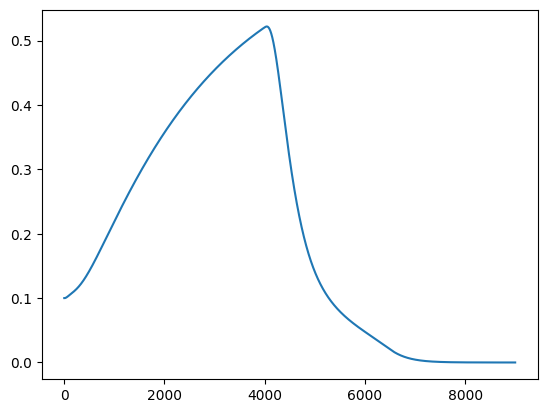

In [145]:
import matplotlib.pyplot as plt
plt.plot(sample_Fprau['Fprau'])

In [114]:
sample_Y  * met_selector.iloc[1]

Fprau   O2 O2_e Species Styphi  butyrate butyrate_e galactarate  \
0      NaN  0.0  NaN     NaN    NaN       0.0        NaN         0.0   
1      NaN  0.0  NaN     NaN    NaN  0.002142        NaN         0.0   
2      NaN  0.0  NaN     NaN    NaN  0.004456        NaN         0.0   
3      NaN  0.0  NaN     NaN    NaN  0.006937        NaN         0.0   
4      NaN  0.0  NaN     NaN    NaN  0.009577        NaN         0.0   
...    ...  ...  ...     ...    ...       ...        ...         ...   
8995   NaN  0.0  NaN     NaN    NaN  0.000016        NaN         0.0   
8996   NaN  0.0  NaN     NaN    NaN  0.000016        NaN         0.0   
8997   NaN  0.0  NaN     NaN    NaN  0.000016        NaN         0.0   
8998   NaN  0.0  NaN     NaN    NaN  0.000016        NaN         0.0   
8999   NaN  0.0  NaN     NaN    NaN  0.000016        NaN         0.0   

     galactose glucarate   glucose neutrophils neutrophils_e nitrate  \
0         0.02       0.0      0.02         NaN           NaN     0.0   
1     0.023758       0.0  0.023758         NaN           NaN     0.0   
2     0.027438       0.0  0.027438         NaN           NaN     0.0   
3     0.031038       0.0  0.031038         NaN           NaN     0.0   
4     0.034561       0.0  0.034561         NaN           NaN     0.0   
...        ...       ...       ...         ...           ...     ...   
8995  0.118237       0.0  0.118237         NaN           NaN     0.0   
8996  0.118237       0.0  0.118237         NaN           NaN     0.0   
8997  0.118236       0.0  0.118236         NaN           NaN     0.0   
8998  0.118236       0.0  0.118236         NaN           NaN     0.0   
8999  0.118236       0.0  0.118236         NaN           NaN     0.0   

     nitric_oxide nitric_oxide_e    t tetrathionate thiosulfate  
0             0.0            NaN  NaN           0.0         0.0  
1             0.0            NaN  NaN           0.0         0.0  
2             0.0            NaN  NaN           0.0         0.0  
3             0.0            NaN  NaN           0.0         0.0  
4             0.0            NaN  NaN           0.0         0.0  
...           ...            ...  ...           ...         ...  
8995          0.0            NaN  NaN           0.0         0.0  
8996          0.0            NaN  NaN           0.0         0.0  
8997          0.0            NaN  NaN           0.0         0.0  
8998          0.0            NaN  NaN           0.0         0.0  
8999          0.0            NaN  NaN           0.0         0.0  

[9000 rows x 19 columns]

In [41]:
data['constraints']

t        O2  nitric_oxide   glucose  galactose  thiosulfate  \
0      0.00 -0.000000     -0.000000 -0.400000  -0.400000    -0.000000   
1      0.01 -5.000000     -5.000000 -0.475235  -0.475235    -5.000000   
2      0.02 -5.000000     -5.000000 -0.548893  -0.548893    -5.000000   
3      0.03 -5.000000     -5.000000 -0.620980  -0.620980    -5.000000   
4      0.04 -5.000000     -5.000000 -0.691504  -0.691504    -5.000000   
...     ...       ...           ...       ...        ...          ...   
8995  89.95 -0.832795     -0.606976 -0.664252  -0.664252    -0.664261   
8996  89.96 -0.832773     -0.606960 -0.664234  -0.664234    -0.664243   
8997  89.97 -0.832751     -0.606943 -0.664216  -0.664216    -0.664226   
8998  89.98 -0.832729     -0.606927 -0.664198  -0.664198    -0.664208   
8999  89.99 -0.832706     -0.606911 -0.664181  -0.664181    -0.664190   

      galactarate  glucarate   nitrate  tetrathionate  
0       -0.000000  -0.000000 -0.000000      -0.000000  
1       -0.000000  -0.000000 -0.000000      -0.000000  
2       -5.000000  -5.000000 -5.000000      -5.000000  
3       -5.000000  -5.000000 -5.000000      -5.000000  
4       -5.000000  -5.000000 -5.000000      -5.000000  
...           ...        ...       ...            ...  
8995    -0.482284  -0.482284 -0.440692      -0.482284  
8996    -0.482271  -0.482271 -0.440681      -0.482271  
8997    -0.482258  -0.482258 -0.440669      -0.482258  
8998    -0.482245  -0.482245 -0.440657      -0.482245  
8999    -0.482233  -0.482233 -0.440645      -0.482233  

[9000 rows x 10 columns]

In [105]:
sample_Y[]

t  Styphi  Fprau  O2  nitric_oxide  glucose  galactose  thiosulfate  \
0       NaN     NaN    NaN NaN           NaN      NaN        NaN          NaN   
1       NaN     NaN    NaN NaN           NaN      NaN        NaN          NaN   
2       NaN     NaN    NaN NaN           NaN      NaN        NaN          NaN   
3       NaN     NaN    NaN NaN           NaN      NaN        NaN          NaN   
4       NaN     NaN    NaN NaN           NaN      NaN        NaN          NaN   
...     ...     ...    ...  ..           ...      ...        ...          ...   
8995  89.95     NaN    NaN NaN           NaN      NaN        NaN          NaN   
8996  89.96     NaN    NaN NaN           NaN      NaN        NaN          NaN   
8997  89.97     NaN    NaN NaN           NaN      NaN        NaN          NaN   
8998  89.98     NaN    NaN NaN           NaN      NaN        NaN          NaN   
8999  89.99     NaN    NaN NaN           NaN      NaN        NaN          NaN   

      galactarate  glucarate  nitrate  tetrathionate  butyrate  neutrophils  \
0             NaN        NaN      NaN            NaN       NaN          NaN   
1             NaN        NaN      NaN            NaN       NaN          NaN   
2             NaN        NaN      NaN            NaN       NaN          NaN   
3             NaN        NaN      NaN            NaN       NaN          NaN   
4             NaN        NaN      NaN            NaN       NaN          NaN   
...           ...        ...      ...            ...       ...          ...   
8995          NaN        NaN      NaN            NaN       NaN     0.763145   
8996          NaN        NaN      NaN            NaN       NaN     0.763145   
8997          NaN        NaN      NaN            NaN       NaN     0.763145   
8998          NaN        NaN      NaN            NaN       NaN     0.763145   
8999          NaN        NaN      NaN            NaN       NaN     0.763145   

      nitric_oxide_e      O2_e  neutrophils_e  butyrate_e  
0                NaN       NaN            NaN         NaN  
1                NaN       NaN            NaN         NaN  
2                NaN       NaN            NaN         NaN  
3                NaN       NaN            NaN         NaN  
4                NaN       NaN            NaN         NaN  
...              ...       ...            ...         ...  
8995             NaN  1.136840       0.802574         NaN  
8996             NaN  1.136841       0.802574         NaN  
8997             NaN  1.136841       0.802574         NaN  
8998             NaN  1.136841       0.802574         NaN  
8999             NaN  1.136841       0.802574         NaN  

[9000 rows x 18 columns]

In [104]:
df_Styphi = df[df['Species'] == 'Styphi']
arr = df_Styphi.iloc[0]
sample_Y[arr.bool()]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
sample_Y = data['Y']   #This is what we want to save.

In [96]:
for met in sample_Y.keys():
    
    if met == 'butyrate':
        print(met)

butyrate


In [4]:
sample_Y

t    Styphi     Fprau        O2  nitric_oxide   glucose  galactose  \
0      0.00  0.000000  0.100000  0.000000      0.000000  0.020000   0.020000   
1      0.01  0.000000  0.099986  0.001000      0.001000  0.023758   0.023758   
2      0.02  0.000000  0.099974  0.002064      0.001979  0.027438   0.027438   
3      0.03  0.000000  0.099966  0.003188      0.002938  0.031038   0.031038   
4      0.04  0.000000  0.099960  0.004366      0.003877  0.034561   0.034561   
...     ...       ...       ...       ...           ...       ...        ...   
8995  89.95  0.355994  0.000005  0.148235      0.108040  0.118237   0.118237   
8996  89.96  0.356004  0.000005  0.148235      0.108040  0.118237   0.118237   
8997  89.97  0.356013  0.000005  0.148235      0.108040  0.118236   0.118236   
8998  89.98  0.356023  0.000005  0.148235      0.108040  0.118236   0.118236   
8999  89.99  0.356032  0.000005  0.148235      0.108040  0.118236   0.118236   

      thiosulfate  galactarate  glucarate       nitrate  tetrathionate  \
0        0.000000     0.000000   0.000000  0.000000e+00   0.000000e+00   
1        0.004167     0.000000   0.000000  0.000000e+00   0.000000e+00   
2        0.008331     0.000002   0.000002  1.000000e-07   4.166667e-07   
3        0.012493     0.000008   0.000008  5.085484e-07   2.136228e-06   
4        0.016650     0.000018   0.000018  1.445028e-06   6.117700e-06   
...           ...          ...        ...           ...            ...   
8995     0.118237     0.085845   0.085845  7.844190e-02   8.584512e-02   
8996     0.118237     0.085845   0.085845  7.844191e-02   8.584513e-02   
8997     0.118236     0.085845   0.085845  7.844192e-02   8.584514e-02   
8998     0.118236     0.085845   0.085845  7.844193e-02   8.584514e-02   
8999     0.118236     0.085845   0.085845  7.844193e-02   8.584515e-02   

      butyrate  neutrophils  nitric_oxide_e      O2_e  neutrophils_e  \
0     0.000000     0.000000        0.100000  0.100000       0.000000   
1     0.002142     0.000000        0.098991  0.107990       0.000000   
2     0.004456     0.000000        0.098003  0.115851       0.000000   
3     0.006937     0.000000        0.097034  0.123588       0.000000   
4     0.009577     0.000000        0.096085  0.131209       0.000000   
...        ...          ...             ...       ...            ...   
8995  0.000016     0.763145        0.488774  1.136840       0.802574   
8996  0.000016     0.763145        0.488774  1.136841       0.802574   
8997  0.000016     0.763145        0.488774  1.136841       0.802574   
8998  0.000016     0.763145        0.488774  1.136841       0.802574   
8999  0.000016     0.763145        0.488774  1.136841       0.802574   

      butyrate_e  
0       0.100000  
1       0.098039  
2       0.096062  
3       0.094075  
4       0.092084  
...          ...  
8995    0.000001  
8996    0.000001  
8997    0.000001  
8998    0.000001  
8999    0.000001  

[9000 rows x 18 columns]

In [66]:
sample_Y.reset_index()

index      t    Styphi     Fprau        O2  nitric_oxide   glucose  \
0         0   0.00  0.000000  0.100000  0.000000      0.000000  0.020000   
1         1   0.01  0.000000  0.099986  0.001000      0.001000  0.023758   
2         2   0.02  0.000000  0.099974  0.002064      0.001979  0.027438   
3         3   0.03  0.000000  0.099966  0.003188      0.002938  0.031038   
4         4   0.04  0.000000  0.099960  0.004366      0.003877  0.034561   
...     ...    ...       ...       ...       ...           ...       ...   
8995   8995  89.95  0.355994  0.000005  0.148235      0.108040  0.118237   
8996   8996  89.96  0.356004  0.000005  0.148235      0.108040  0.118237   
8997   8997  89.97  0.356013  0.000005  0.148235      0.108040  0.118236   
8998   8998  89.98  0.356023  0.000005  0.148235      0.108040  0.118236   
8999   8999  89.99  0.356032  0.000005  0.148235      0.108040  0.118236   

      galactose  thiosulfate  galactarate  glucarate       nitrate  \
0      0.020000     0.000000     0.000000   0.000000  0.000000e+00   
1      0.023758     0.004167     0.000000   0.000000  0.000000e+00   
2      0.027438     0.008331     0.000002   0.000002  1.000000e-07   
3      0.031038     0.012493     0.000008   0.000008  5.085484e-07   
4      0.034561     0.016650     0.000018   0.000018  1.445028e-06   
...         ...          ...          ...        ...           ...   
8995   0.118237     0.118237     0.085845   0.085845  7.844190e-02   
8996   0.118237     0.118237     0.085845   0.085845  7.844191e-02   
8997   0.118236     0.118236     0.085845   0.085845  7.844192e-02   
8998   0.118236     0.118236     0.085845   0.085845  7.844193e-02   
8999   0.118236     0.118236     0.085845   0.085845  7.844193e-02   

      tetrathionate  butyrate  neutrophils  nitric_oxide_e      O2_e  \
0      0.000000e+00  0.000000     0.000000        0.100000  0.100000   
1      0.000000e+00  0.002142     0.000000        0.098991  0.107990   
2      4.166667e-07  0.004456     0.000000        0.098003  0.115851   
3      2.136228e-06  0.006937     0.000000        0.097034  0.123588   
4      6.117700e-06  0.009577     0.000000        0.096085  0.131209   
...             ...       ...          ...             ...       ...   
8995   8.584512e-02  0.000016     0.763145        0.488774  1.136840   
8996   8.584513e-02  0.000016     0.763145        0.488774  1.136841   
8997   8.584514e-02  0.000016     0.763145        0.488774  1.136841   
8998   8.584514e-02  0.000016     0.763145        0.488774  1.136841   
8999   8.584515e-02  0.000016     0.763145        0.488774  1.136841   

      neutrophils_e  butyrate_e  
0          0.000000    0.100000  
1          0.000000    0.098039  
2          0.000000    0.096062  
3          0.000000    0.094075  
4          0.000000    0.092084  
...             ...         ...  
8995       0.802574    0.000001  
8996       0.802574    0.000001  
8997       0.802574    0.000001  
8998       0.802574    0.000001  
8999       0.802574    0.000001  

[9000 rows x 19 columns]

In [61]:
sum(sample_Y['Fprau'].isna())

0

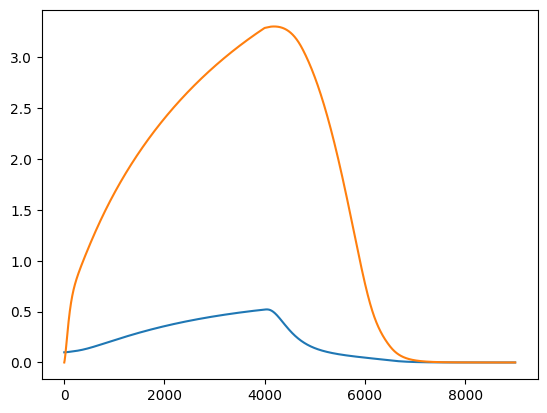

In [198]:
import matplotlib.pyplot as plt

#plt.plot(sample_Y['Styphi'])
plt.plot(sample_Y['Fprau'])
plt.plot(sample_Y['butyrate'])

In [49]:
sample_Y['Styphi']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8995    0.355994
8996    0.356004
8997    0.356013
8998    0.356023
8999    0.356032
Name: Styphi, Length: 9000, dtype: float64

In [44]:
import pandas as pd

data['constraints'].to_csv('data/samples/sample_ndefault_constraints.csv')
data['Y'].to_csv('data/samples/sample_ndefault_solutions.csv')
